# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.12.0-tau-fu3.new.339.357.359.362.366.367.382.383.fix.360.373'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See', 'Timor-Leste', 'Solomon Islands'],
 3: ['Laos', 'Saint Kitts and Nevis', 'Tanzania'],
 4: ['Dominica', 'Brunei', 'Grenada', 'Saint Lucia'],
 5: ['Fiji', 'Equatorial Guinea'],
 6: ['Saint Vincent and the Grenadines', 'Antigua and Barbuda', 'Mauritius'],
 7: ['Gambia', 'Northern Mariana Islands'],
 8: ['Madagascar', 'Vietnam', 'Seychelles', 'Barbados', 'Cambodia', 'Bahamas',
     'Malawi', 'Kyrgyzstan', 'Trinidad and Tobago', 'Lesotho', 'Monaco'],
 9: ['Oman', 'Venezuela', 'Bolivia', 'Swaziland', 'Zimbabwe', 'South Africa',
     'Zambia', 'Namibia', 'Virgin Islands, U.S.', 'Mongolia', 'Suriname',
     'Ghana', 'Senegal', 'Liechtenstein', 'Djibouti', 'Kazakhstan', 'Guyana',
     'Uzbekistan', 'Republic of the Congo', 'Sao Tome and Principe',
     'Australia', 'Burundi'],
 10: ['New Zealand', 'Jamaica', 'Belize', 'Syria', 'Bahrain', 'Chile',
      'Singapore', 'Libya', 'El Salvador', 'Gabon', 'Guam', 'Yemen', 'Eritrea',
      'Papua New Guinea', 'Bermuda', 'Ethiopia', 'Mal

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Finland', 'Portugal', 'Romania', 'United Kingdom', 'France', 'Denmark']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Finland 0th    Past  16Mar2020  04Apr2020     5515525
        1st    Past  05Apr2020  19Apr2020     5515525
        2nd    Past  20Apr2020  04May2020     5515525
        3rd    Past  05May2020  26May2020     5515525
        4th    Past  27May2020  18Aug2020     5515525
...             ...        ...        ...         ...
Denmark 11th   Past  30Oct2020  04Nov2020     5793636
        12th   Past  05Nov2020  11Nov2020     5793636
        13th   Past  12Nov2020  17Nov2020     5793636
        14th   Past  18Nov2020  23Nov2020     5793636
        15th   Past  24Nov2020  09Dec2020     5793636

[96 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	FIN,  0th phase (16Mar2020 - 04Apr2020): finished  156 trials in 0 min 10 sec

	ROU, 12th phase (12Nov2020 - 17Nov2020): finished  162 trials in 0 min 10 sec

	DNK, 15th phase (24Nov2020 - 09Dec2020): finished  155 trials in 0 min 10 sec

	DNK,  7th phase (25Sep2020 - 05Oct2020): finished  160 trials in 0 min 10 sec

	PRT,  7th phase (16Sep2020 - 01Oct2020): finished  182 trials in 0 min 10 sec

	FIN, 14th phase (26Nov2020 - 01Dec2020): finished  196 trials in 0 min 10 sec

	PRT, 15th phase (03Dec2020 - 09Dec2020): finished  164 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  172 trials in 0 min 10 sec

	FRA, 10th phase (16Oct2020 - 21Oct2020): finished  135 trials in 0 min 10 sec

	PRT,  9th phase (14Oct2020 - 21Oct2020): finished  138 trials in 0 min 10 sec

	FIN, 10th phase (29Oct2020 - 04Nov2020): finished  139 trials in 0 min 10 sec

	PRT,  4th phase (19Jun2020 - 14Jul2020): finished  135 trials in 0 min 10 sec

	PRT, 11th phase (28Oct2020 - 02Nov2020): finished  186 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  198 trials in 0 min 10 sec

	DNK,  4th phase (07Aug2020 - 05Sep2020): finished  185 trials in 0 min 10 sec

	FIN, 15th phase (02Dec2020 - 09Dec2020): finished  196 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  9th phase (16Oct2020 - 23Oct2020): finished  211 trials in 0 min 10 sec

	FRA,  2nd phase (23Apr2020 - 08Jul2020): finished  186 trials in 0 min 10 sec

	FIN, 11th phase (05Nov2020 - 11Nov2020): finished  207 trials in 0 min 10 sec

	FRA,  6th phase (15Sep2020 - 22Sep2020): finished  205 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	PRT,  0th phase (14Mar2020 - 01Apr2020): finished  131 trials in 0 min 10 sec

	DNK,  0th phase (19Mar2020 - 12Apr2020): finished  131 trials in 0 min 10 sec

	FRA,  0th phase (07Feb2020 - 30Mar2020): finished  125 trials in 0 min 10 sec

	PRT, 13th phase (13Nov2020 - 22Nov2020): finished  136 trials in 0 min 10 sec

	PRT,  1st phase (02Apr2020 - 18Apr2020): finished  188 trials in 0 min 10 sec

	FIN,  6th phase (21Sep2020 - 03Oct2020): finished  196 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FIN,  5th phase (19Aug2020 - 20Sep2020): finished  186 trials in 0 min 10 sec

	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  191 trials in 0 min 10 sec

	FRA,  3rd phase (09Jul2020 - 18Aug2020): finished  200 trials in 0 min 10 sec

	DNK,  5th phase (06Sep2020 - 16Sep2020): finished  208 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  222 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  205 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 16Aug2020): finished  128 trials in 0 min 10 sec

	ROU, 13th phase (18Nov2020 - 24Nov2020): finished  136 trials in 0 min 10 sec

	DNK, 14th phase (18Nov2020 - 23Nov2020): finished  136 trials in 0 min 10 sec

	PRT,  6th phase (26Aug2020 - 15Sep2020): finished  132 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FIN,  3rd phase (05May2020 - 26May2020): finished  146 trials in 0 min 10 sec

	PRT, 10th phase (22Oct2020 - 27Oct2020): finished  155 trials in 0 min 10 sec

	FRA,  4th phase (19Aug2020 - 02Sep2020): finished  161 trials in 0 min 10 sec

	ROU,  1st phase (26Apr2020 - 25Jun2020): finished  164 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  2nd phase (24Apr2020 - 11May2020): finished  189 trials in 0 min 10 sec

	ROU,  0th phase (05Mar2020 - 25Apr2020): finished  177 trials in 0 min 10 sec

	ROU,  7th phase (02Oct2020 - 12Oct2020): finished  169 trials in 0 min 10 sec

	FRA, 12th phase (01Nov2020 - 10Nov2020): finished  162 trials in 0 min 10 sec

	PRT, 14th phase (23Nov2020 - 02Dec2020): finished  171 trials in 0 min 10 sec

	PRT,  2nd phase (19Apr2020 - 20May2020): finished  175 trials in 0 min 10 sec

	ROU,  5th phase (29Aug2020 - 15Sep2020): finished  177 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  173 trials in 0 min 10 sec

	ROU,  8th phase (13Oct2020 - 20Oct2020): finished  133 trials in 0 min 10 sec

	ROU,  9th phase (21Oct2020 - 28Oct2020): finished  137 trials in 0 min 10 sec

	ROU,  2nd phase (26Jun2020 - 23Jul2020): finished  138 trials in 0 min 10 sec

	FIN,  9th phase (20Oct2020 - 28Oct2020): finished  146 trials in 0 min 10 sec

	DNK, 11th phase (30Oct2020 - 04Nov2020): finished  199 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 18Aug2020): finished  175 trials in 0 min 10 sec

	ROU,  3rd phase (24Jul2020 - 10Aug2020): finished  189 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  6th phase (17Sep2020 - 24Sep2020): finished  182 trials in 0 min 10 sec

	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  147 trials in 0 min 10 sec

	FRA,  7th phase (23Sep2020 - 01Oct2020): finished  145 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  3rd phase (12Jun2020 - 06Aug2020): finished  130 trials in 0 min 10 sec

	FIN, 12th phase (12Nov2020 - 19Nov2020): finished  144 trials in 0 min 10 sec

	FRA,  9th phase (09Oct2020 - 15Oct2020): finished  149 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  157 trials in 0 min 10 sec

	FIN, 13th phase (20Nov2020 - 25Nov2020): finished  160 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK, 10th phase (24Oct2020 - 29Oct2020): finished  170 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	DNK,  1st phase (13Apr2020 - 02May2020): finished  210 trials in 0 min 10 sec

	FIN,  8th phase (12Oct2020 - 19Oct2020): finished  212 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA,  8th phase (02Oct2020 - 08Oct2020): finished  207 trials in 0 min 10 sec

	FRA,  1st phase (31Mar2020 - 22Apr2020): finished  195 trials in 0 min 10 sec

	FRA, 11th phase (22Oct2020 - 31Oct2020): finished  144 trials in 0 min 10 sec

	PRT,  3rd phase (21May2020 - 18Jun2020): finished  130 trials in 0 min 10 sec

	PRT, 12th phase (03Nov2020 - 12Nov2020): finished  133 trials in 0 min 10 sec

	ROU, 14th phase (25Nov2020 - 01Dec2020): finished  141 trials in 0 min 10 sec

	PRT,  5th phase (15Jul2020 - 25Aug2020): finished  227 trials in 0 min 10 sec

	PRT,  8th phase (02Oct2020 - 13Oct2020): finished  235 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FRA, 14th phase (24Nov2020 - 01Dec2020): finished  263 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  270 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	GBR,  3rd phase (12May2020 - 11Jun2020): finished  252 trials in 0 min 10 sec

	FRA, 13th phase (11Nov2020 - 23Nov2020): finished  262 trials in 0 min 10 sec

	DNK,  2nd phase (03May2020 - 11Jun2020): finished  170 trials in 0 min 10 sec

	GBR,  5th phase (17Aug2020 - 17Sep2020): finished  167 trials in 0 min 10 sec

/home/runner/.local/share/virtualenvs/covid19-sir-kT3BL-HO/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


	FIN,  7th phase (04Oct2020 - 11Oct2020): finished  262 trials in 0 min 10 sec

	FRA,  5th phase (03Sep2020 - 14Sep2020): finished  264 trials in 0 min 10 sec

	ROU,  4th phase (11Aug2020 - 28Aug2020): finished  282 trials in 0 min 10 sec

	DNK,  8th phase (06Oct2020 - 15Oct2020): finished  285 trials in 0 min 10 sec

Completed optimization. Total: 4 min 36 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE      Rt  \
Country Phase                                                          
Finland 0th    Past  16Mar2020  04Apr2020     5515525  SIR-F  101.31   
        1st    Past  05Apr2020  19Apr2020     5515525  SIR-F    2.84   
        2nd    Past  20Apr2020  04May2020     5515525  SIR-F    1.01   
        3rd    Past  05May2020  26May2020     5515525  SIR-F     0.4   
        4th    Past  27May2020  18Aug2020     5515525  SIR-F     0.6   
...             ...        ...        ...         ...    ...     ...   
Denmark 11th   Past  30Oct2020  04Nov2020     5793636  SIR-F    1.81   
        12th   Past  05Nov2020  11Nov2020     5793636      -       -   
        13th   Past  12Nov2020  17Nov2020     5793636      -       -   
        14th   Past  18Nov2020  23Nov2020     5793636  SIR-F    1.42   
        15th   Past  24Nov2020  09Dec2020     5793636  SIR-F    1.17   

                    theta        kappa         rho        sigma  tau  \
Country Phase                                                          
Finland 0th      0.001072  7.93546e-05   0.0218232  0.000135819  360   
        1st     0.0201457  0.000237264   0.0150962   0.00497314  360   
        2nd     0.0635399  0.000517433   0.0141411     0.012608  360   
        3rd      0.061668  0.000109302  0.00748359    0.0172636  360   
        4th      0.113093  0.000233778  0.00942149    0.0137532  360   
...                   ...          ...         ...          ...  ...   
Denmark 11th   0.00118261  7.11254e-05   0.0199418    0.0109549  360   
        12th            -            -           -            -    -   
        13th            -            -           -            -    -   
        14th    0.0374416   5.4333e-05   0.0222434    0.0150448  360   
        15th   0.00180544  0.000895908   0.0202689    0.0163557  360   

              1/beta [day] 1/gamma [day] alpha1 [-] 1/alpha2 [day]      RMSLE  \
Country Phase                                                                   
Finland 0th             11          1840      0.001           3150   0.672601   
        1st             16            50       0.02           1053   0.286839   
        2nd             17            19      0.064            483  0.0858668   
        3rd             33            14      0.062           2287   0.142942   
        4th             26            18      0.113           1069   0.398719   
...                    ...           ...        ...            ...        ...   
Denmark 11th            12            22      0.001           3514  0.0225527   
        12th             -             -          -              -          -   
        13th             -             -          -              -          -   
        14th            11            16      0.037           4601  0.0964618   
        15th            12            15      0.002            279    0.23818   

              Trials       Runtime  
Country Phase                       
Finland 0th      156  0 min 10 sec  
        1st      198  0 min 10 sec  
        2nd      157  0 min 10 sec  
        3rd      146  0 min 10 sec  
        4th      175  0 min 10 sec  
...              ...           ...  
Denmark 11th     199  0 min 10 sec  
        12th       -             -  
        13th       -             -  
        14th     136  0 min 10 sec  
        15th     155  0 min 10 sec  

[96 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-16,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,57.41
1,2020-03-17,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,57.41
2,2020-03-18,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81
3,2020-03-19,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81
4,2020-03-20,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81


### $Rt$: Reprodcution number $\mathrm{[-]}$

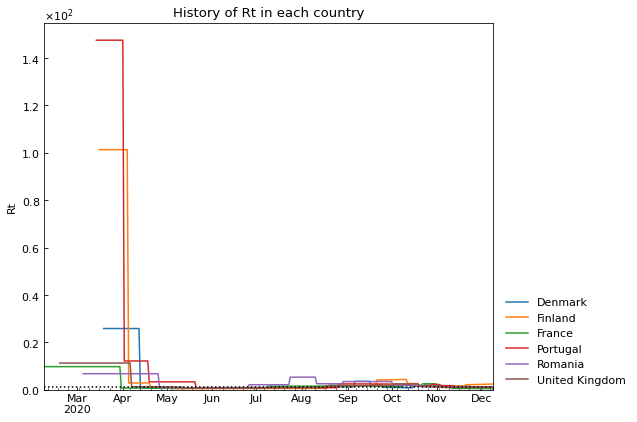

Country,Denmark,Finland,France,Portugal,Romania,United Kingdom
Date,,,,,,
2020-12-05,1.17,2.39,0.44,1.1,0.88,0.96
2020-12-06,1.17,2.39,0.44,1.1,0.88,0.96
2020-12-07,1.17,2.39,0.44,1.1,0.88,0.96
2020-12-08,1.17,2.39,0.44,1.1,0.88,0.96
2020-12-09,1.17,2.39,0.44,1.1,0.88,0.96


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

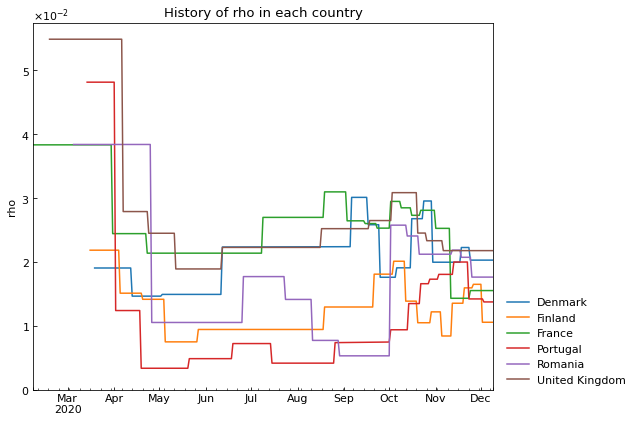

Country,Denmark,Finland,France,Portugal,Romania,United Kingdom
Date,,,,,,
2020-12-05,0.020269,0.01055,0.015505,0.013729,0.017613,0.021755
2020-12-06,0.020269,0.01055,0.015505,0.013729,0.017613,0.021755
2020-12-07,0.020269,0.01055,0.015505,0.013729,0.017613,0.021755
2020-12-08,0.020269,0.01055,0.015505,0.013729,0.017613,0.021755
2020-12-09,0.020269,0.01055,0.015505,0.013729,0.017613,0.021755


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

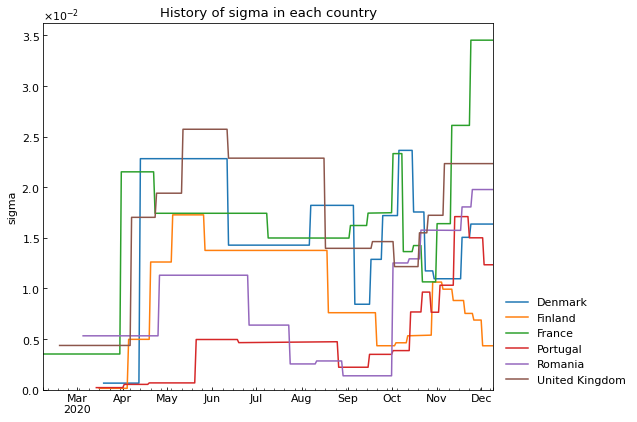

Country,Denmark,Finland,France,Portugal,Romania,United Kingdom
Date,,,,,,
2020-12-05,0.016356,0.004337,0.034514,0.012335,0.019764,0.022324
2020-12-06,0.016356,0.004337,0.034514,0.012335,0.019764,0.022324
2020-12-07,0.016356,0.004337,0.034514,0.012335,0.019764,0.022324
2020-12-08,0.016356,0.004337,0.034514,0.012335,0.019764,0.022324
2020-12-09,0.016356,0.004337,0.034514,0.012335,0.019764,0.022324


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

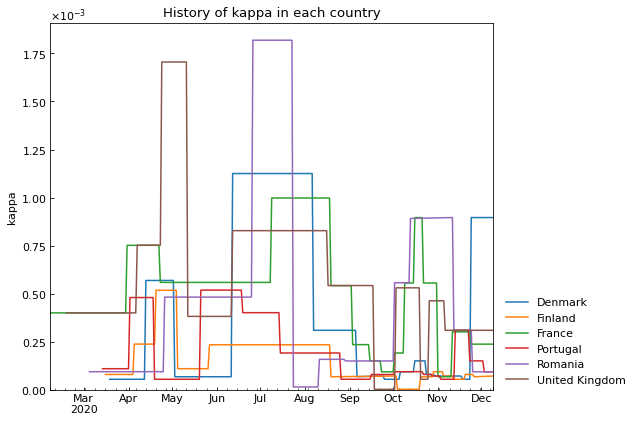

Country,Denmark,Finland,France,Portugal,Romania,United Kingdom
Date,,,,,,
2020-12-05,0.000896,0.000071,0.000237,0.000093,0.000093,0.000309
2020-12-06,0.000896,0.000071,0.000237,0.000093,0.000093,0.000309
2020-12-07,0.000896,0.000071,0.000237,0.000093,0.000093,0.000309
2020-12-08,0.000896,0.000071,0.000237,0.000093,0.000093,0.000309
2020-12-09,0.000896,0.000071,0.000237,0.000093,0.000093,0.000309


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

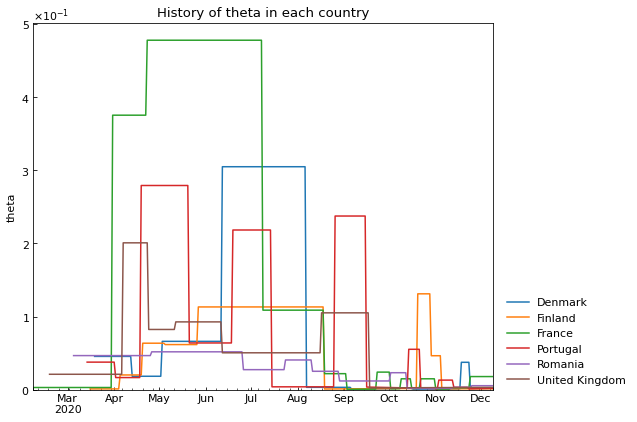

Country,Denmark,Finland,France,Portugal,Romania,United Kingdom
Date,,,,,,
2020-12-05,0.001805,0.001328,0.017944,0.001911,0.005474,0.003232
2020-12-06,0.001805,0.001328,0.017944,0.001911,0.005474,0.003232
2020-12-07,0.001805,0.001328,0.017944,0.001911,0.005474,0.003232
2020-12-08,0.001805,0.001328,0.017944,0.001911,0.005474,0.003232
2020-12-09,0.001805,0.001328,0.017944,0.001911,0.005474,0.003232


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18210 entries, 0 to 18279
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 18210 non-null  datetime64[ns]
 1   Country                              18210 non-null  object        
 2   Rt                                   18210 non-null  float64       
 3   theta                                18210 non-null  float64       
 4   kappa                                18210 non-null  float64       
 5   rho                                  18210 non-null  float64       
 6   sigma                                18210 non-null  float64       
 7   School_closing                       18210 non-null  int64         
 8   Workplace_closing                    18210 non-null  int64         
 9   Cancel_events                        18210 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.118041,-0.147656,0.354925,-0.342090,-0.022403,-0.037745,-0.172349,-0.215523,-0.196694,-0.066434,-0.225785,-0.063770,-0.096871,-0.179339,-0.097362,-0.111191
theta,-0.118041,1.000000,0.226332,-0.211101,0.134159,0.306672,0.265668,0.259439,0.227536,0.211728,0.220495,0.272555,0.228035,0.138475,-0.150006,0.088617,0.329796
kappa,-0.147656,0.226332,1.000000,0.088933,0.240294,0.296322,0.114893,0.056101,0.176025,0.124409,0.068377,0.270819,-0.194762,0.061396,-0.217818,0.030883,0.121489
rho,0.354925,-0.211101,0.088933,1.000000,-0.304848,-0.308101,-0.347133,-0.512193,-0.500977,-0.446851,-0.343293,-0.208031,-0.555517,-0.286189,-0.532186,-0.161332,-0.446788
sigma,-0.342090,0.134159,0.240294,-0.304848,1.000000,0.358687,0.354256,0.376490,0.527087,0.431777,0.239907,0.525538,0.138007,0.302280,0.117554,0.339761,0.407415
School_closing,-0.022403,0.306672,0.296322,-0.308101,0.358687,1.000000,0.794267,0.632157,0.582921,0.515298,0.635214,0.529259,0.106178,0.370536,-0.151980,-0.045204,0.796370
Workplace_closing,-0.037745,0.265668,0.114893,-0.347133,0.354256,0.794267,1.000000,0.766729,0.648155,0.636338,0.801950,0.544622,0.206121,0.453363,-0.067500,-0.191234,0.913759
Cancel_events,-0.172349,0.259439,0.056101,-0.512193,0.376490,0.632157,0.766729,1.000000,0.707232,0.664913,0.612291,0.557720,0.283608,0.563016,0.169866,-0.022022,0.874874
Gatherings_restrictions,-0.215523,0.227536,0.176025,-0.500977,0.527087,0.582921,0.648155,0.707232,1.000000,0.834158,0.597970,0.773228,0.472456,0.575829,0.364083,0.268625,0.780375
Transport_closing,-0.196694,0.211728,0.124409,-0.446851,0.431777,0.515298,0.636338,0.664913,0.834158,1.000000,0.625703,0.710352,0.412689,0.527907,0.366762,0.204483,0.736542


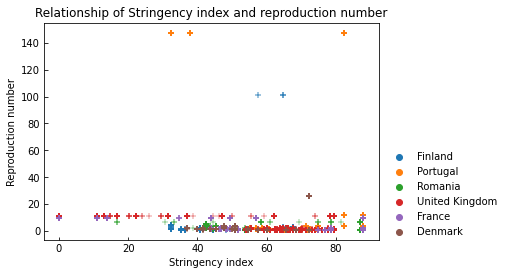

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()